# **Dataset Outlook**

Conclusions: <br>
1. Imbalanced Data: about 0.26% vs 99.74%<br>
2. Training data includes three days data: 2017-11-06 Monday 14:32 to 2017-11-09 Thursday 16:00 <br>
3. To check data.describe(), at least one day data should be loaded, around 55 000 000 rows. <br>
4. Create new features: <br>
(a) Frequency (clicks), downloads frequency and mean_download_ratio per group of "IP, device and OS" <br>
(b) Convert timestamp to hour (categorical data): eg.  2017-11-06 11:30:11 $\rightarrow$ 11. 

# Before Dataset Overlook

## Features:

IP: Which region or country a user is located is relevant to whether he or she fraudulently clicks on the AD. <br>
(a). Fraud user can clicks on a same AD for many times but using same IP.<br>
(b). However, a family or people in the same company can share a same IP, which means a same ip can contain regular user and fraud user. <br>
BY group by Device, OS, channel etc can further differentiate that.
<br>
APP: *(Can be used group by IP)* app id for marketing <br>
Device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.) <br>
OS: *(Can be used group by IP)* os version id of user mobile phone <br>
Channel:  channel id of mobile ad publisher <br>
click_time: <br> 
(a). A regular user and a fraud user varys in terms of when they click on AD.<br>
(b). Durations of click_time of a same IP can make a prediction.
attributed_time:<br>
**is_attributed**: Target Value 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
# import dask
# import dask.dataframe as dd        
import warnings
warnings.filterwarnings('ignore')
train_dir = "./train.csv"


## After first glimpse of the dataset, we find:

1. Training Dataset is over from 2017-11-06 (Monday) 14:32 to 2017-11-09 (Thursday) 16:00
2. Training Dataset is too large to directly load into 16GB RAM. <br>
(a). IP, APP, Device, OS and Channel' datatype can be reduced from INT64 to INT16/32.
(b). Click_time and Attributed_time datatype should be changed to timestamp
3. Top three most relavant features: IP, APP, Channel. NOTICE: click_time has not examined. (Device: -0.001962 -- -0.000018; OS: -0.004403 -- -0.002146. Can be deleted or not)

In [6]:
# Head  10 000 000 rows
train = pd.read_csv(train_dir, nrows=(1000000))


## First Glimpse of Data

In [7]:
print("Train data Head and Tail:")
print(train.head())


Train data Head and Tail:
       ip  app  device  os  channel           click_time attributed_time  \
0   83230    3       1  13      379  2017-11-06 14:32:21             NaN   
1   17357    3       1  19      379  2017-11-06 14:33:34             NaN   
2   35810    3       1  13      379  2017-11-06 14:34:12             NaN   
3   45745   14       1  13      478  2017-11-06 14:34:52             NaN   
4  161007    3       1  13      379  2017-11-06 14:35:08             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  


In [8]:
print(train.describe())
print(train.info())


                   ip             app          device              os  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     86993.581653       12.316655       26.141368       23.067662   
std      55529.023541       16.216890      273.537010       55.323313   
min          9.000000        0.000000        0.000000        0.000000   
25%      42297.000000        3.000000        1.000000       13.000000   
50%      81725.000000       12.000000        1.000000       18.000000   
75%     120440.000000       15.000000        1.000000       19.000000   
max     212773.000000      645.000000     3379.000000      715.000000   

              channel   is_attributed  
count  1000000.000000  1000000.000000  
mean       241.523634        0.001693  
std        122.713405        0.041111  
min          0.000000        0.000000  
25%        134.000000        0.000000  
50%        232.000000        0.000000  
75%        280.000000        0.000000  
max        498.000000 

In [6]:
train.corr()


,ip,app,device,os,channel,is_attributed
ip,1.000000,0.016097,-0.003968,-0.004742,0.029664,0.021128
app,0.016097,1.000000,0.273510,0.196557,-0.015453,0.046686
device,-0.003968,0.273510,1.000000,0.721928,-0.033914,-0.001962
os,-0.004742,0.196557,0.721928,1.000000,0.043651,-0.004403
channel,0.029664,-0.015453,-0.033914,0.043651,1.000000,-0.035484
is_attributed,0.021128,0.046686,-0.001962,-0.004403,-0.035484,1.000000


# LOAD ALL DATA

1. Reduce datatype to uint (length in total: 184 903 890 rows) (6 * 10^7 about one day)
2. Using dask (this is for big data)

In [ ]:
dtypes = {
        'ip'            : 'uint32', #max 3.65*10^5 better to use uint32  (as uint16: upto 65535)
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }
train = pd.read_csv(train_dir,  dtype=dtypes)
# solely load in regular numpy way 9.4G
# I have deleted large df object but do not know why did not collect memory


In [5]:
train.describe() 


,ip,app,device,os,channel,is_attributed
count,5.500000e+07,5.500000e+07,5.500000e+07,5.500000e+07,5.500000e+07,5.500000e+07
mean,8.620490e+04,1.248198e+01,3.670648e+01,2.530424e+01,2.670721e+02,2.628036e-03
std,5.587764e+04,1.621851e+01,3.257265e+02,6.483965e+01,1.292837e+02,5.119697e-02
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.092400e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.400000e+02,0.000000e+00
50%,8.055800e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.450000e+02,0.000000e+00
75%,1.205750e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00
max,2.127740e+05,6.760000e+02,3.545000e+03,7.480000e+02,4.980000e+02,1.000000e+00


In [6]:
train.corr()


,ip,app,device,os,channel,is_attributed
ip,1.000000,0.005963,-0.005148,-0.005061,0.006509,0.033893
app,0.005963,1.000000,0.205047,0.205154,-0.033175,0.055970
device,-0.005148,0.205047,1.000000,0.969272,-0.086981,-0.001281
os,-0.005061,0.205154,0.969272,1.000000,-0.084894,-0.001358
channel,0.006509,-0.033175,-0.086981,-0.084894,1.000000,-0.026450
is_attributed,0.033893,0.055970,-0.001281,-0.001358,-0.026450,1.000000


In [ ]:
dtypes = {'ip':'uint32',
          'app': 'uint16',
          'device': 'uint16',
          'os': 'uint16',
          'channel': 'uint16',
          'is_attributed': 'uint8'}

train = dd.read_csv(train_dir, dtype=dtypes, parse_dates=['click_time', 'attributed_time'])
train.head()


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000000 entries, 0 to 54999999
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ip               uint32        
 1   app              uint16        
 2   device           uint16        
 3   os               uint16        
 4   channel          uint16        
 5   click_time       datetime64[ns]
 6   attributed_time  datetime64[ns]
 7   is_attributed    uint8         
dtypes: datetime64[ns](2), uint16(4), uint32(1), uint8(1)
memory usage: 1.5 GB


In [15]:
ip_counts = train.ip.value_counts().compute()
ip_counts[:20]


5348      343734
5314      323478
73516     207679
73487     204923
53454     134532
114276    121197
26995     109034
95766     103622
86767      83785
105560     79732
100275     78016
201182     77623
105475     77187
43793      76943
137052     76934
209663     74004
147957     69195
17149      64332
111025     62162
93587      50126
Name: ip, dtype: int64

In [16]:
channel_means = train[['channel','is_attributed']].groupby('channel').mean().compute()
channel_means[:20]


,is_attributed
channel,
0,0.074310
3,0.000431
4,0.081481
5,0.489284
13,0.000644
14,0.166667
15,0.000000
17,0.000169
18,0.000256


## SEABORN 
### IP frequency

<AxesSubplot:xlabel='ip', ylabel='Count'>

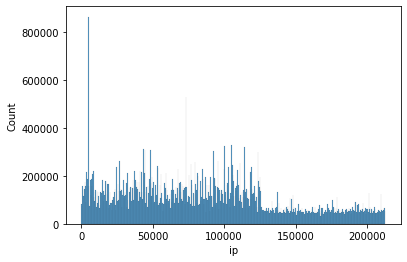

In [17]:
sns.histplot(train.ip)


# Features Engineering


1. Time Series Engineering <br>
2. Other features: is_attributed group by IP：<br>
a. (i). clicks per IP; (ii). click_ratio per IP <br>

In [ ]:
tra.values[:,list(range(1,3)) + [0]]


In [ ]:
f = tra.groupby(["ip",'device','os'])['is_attributed'].count().reset_index().rename(index=str, columns={'is_attributed': 'ip-device-os-clicks'})

In [ ]:
tra.merge(f, on=["ip",'device','os'], how='left')


In [ ]:
tra.head()


### Downloads ratio (the ratio of downloads and all clicks) per ip-device-os

In [ ]:
tra[['ip','device','os','is_attributed']].groupby(["ip",'device','os']).mean() # 25/1/17: 0.142857

### Frequency per ip-device-os

In [ ]:
tra[['ip','device','os','is_attributed']].groupby(["ip",'device','os']).count()


### Downloads frequency per ip-device-os

In [ ]:
tra[['ip','device','os','is_attributed']].groupby(["ip",'device','os']).sum()


In [ ]:
ip_attributed_counts = tra[['ip','is_attributed']].groupby(["ip"]).sum()


In [ ]:
tra[['ip','is_attributed']][tra.is_attributed == 1].groupby(["ip"]).count()


# Visulization Data (once again)
about 5.5 * 10^7 a whole day (2017-11-06 14:32:21 -- 2017-11-07 14:24:01)

In [2]:
dtypes = {'ip':'uint32',
          'app': 'uint16',
          'device': 'uint16',
          'os': 'uint16',
          'channel': 'uint16',
          'is_attributed': 'uint8'}

dataVisual = pd.read_csv(train_dir, dtype=dtypes, parse_dates=['click_time', 'attributed_time'], nrows=(55000000))

# Is_attributed Ratio Over Day: 0.26% vs 99.74% 

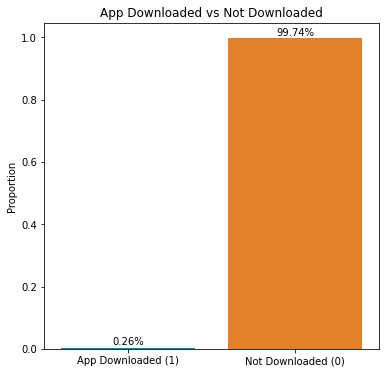

In [10]:
plt.figure(figsize = (6,6))
#sns.set(font_scale=1.2)
mean = (dataVisual.is_attributed.values == 1).mean()
ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1 - mean])
ax.set(ylabel = 'Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1 - mean]):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha = "center")
    

In [10]:
dataVisual.is_attributed


0           0
1           0
2           0
3           0
4           0
           ..
54999995    0
54999996    0
54999997    0
54999998    0
54999999    0
Name: is_attributed, Length: 55000000, dtype: uint8

In [11]:
dataVisual['hour'] = dataVisual['click_time'].dt.hour


In [12]:
mean_attributed = dataVisual[['hour','is_attributed']].groupby(['hour']).mean()


In [13]:
counts_clicks = dataVisual[['hour','is_attributed']].groupby(['hour']).count()


In [14]:
counts_attributed = dataVisual[['hour','is_attributed']].groupby(['hour']).sum()


# Mean true downloads Peak Hours
16 o'clock true downloads rate lowest

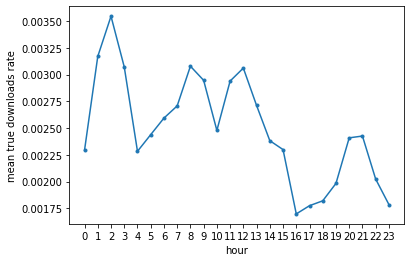

In [19]:
plt.plot(mean_attributed,'.-')
plt.xlabel("hour")
plt.ylabel("mean true downloads rate")
plt.xticks(ticks = range(24))
plt.show()


# Clicks vs hour
On 15:00, lowest clicks: only 435 clicks. 
Yet later 16:00 is a peak, but lowest true download.

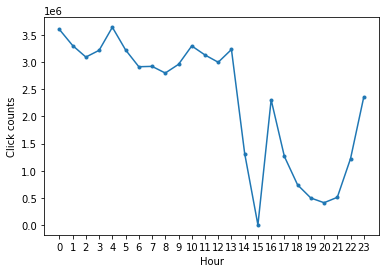

In [20]:
plt.plot(counts_clicks,'.-')
plt.xlabel("Hour")
plt.ylabel("Click counts")
plt.xticks(ticks = range(24))
plt.show()


# Downloads vs hour
At 15:00 -- 15:59, only one download but it is also the minimum for clicks
The mean download is not the lowest, but it may be just noise.

At 16:00 -- 16.59, clearly a lot of clicks are contributed by the fraud clicks

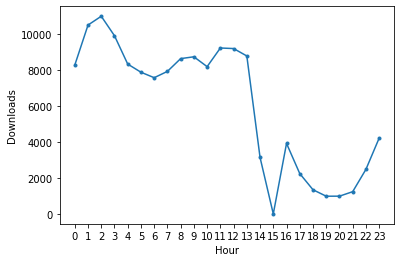

In [21]:
plt.plot(counts_attributed,'.-')
plt.xlabel("Hour")
plt.ylabel("Downloads")
plt.xticks(ticks = range(24))
plt.show()
